In [3]:
#kinder

import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    img_gray = cv2.cvtColor(hsv,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img_gray,25,151,3)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    img = cv2.drawContours(hsv, contours, -1, (0,255,0), 8)
    
    
    # define range of blue color in HSV
    lower_blue = np.array([10,110,100])
    upper_blue = np.array([100,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask= mask)
    
    # Display the resulting frame
    cv2.imshow('frame',res)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [2]:
#cola

import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([110,170,110])
    upper_blue = np.array([250,250,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
    
    # Display the resulting frame
    cv2.imshow('frame',res)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [18]:
cv2.COLOR_BGR2GRAY

6

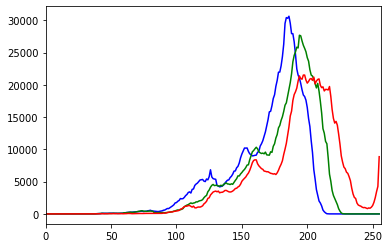

In [71]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('kinder.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [17]:
img = cv2.imread('kinder.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

img_gray = cv2.cvtColor(hsv,cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(img_gray,135,11,3)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(hsv, contours, -1, (0,255,0), 3)

cv2.imshow('res',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [139]:
cv2.threshold?


In [5]:
# # define range of blue color in HSV
# lower_blue = np.array([0,120,0])
# upper_blue = np.array([255,255,255])

# # Threshold the HSV image to get only blue colors
# mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
# res = cv2.bitwise_and(img,img, mask= mask)

# cv2.imshow('frame',img)
# cv2.imshow('mask',mask)

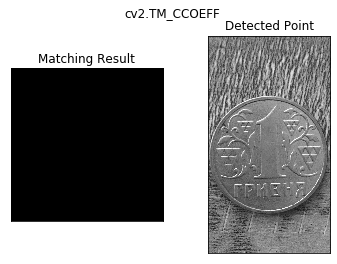

In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('1.jpg',0)
img2 = img.copy()
template = cv2.imread('1.jpg',0)
w, h = template.shape[::-1]

img = img2.copy()
method = eval('cv2.TM_CCOEFF')

res = cv2.matchTemplate(img,template,method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(img,top_left, bottom_right, 255, 2)

cv2.rectangle(img,top_left, bottom_right, 255, 2)
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle('cv2.TM_CCOEFF')
plt.show()